In [ ]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

## Задача 1: скучная разминка (25 баллов)

__[5 баллов]__ Создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5.

- Найдите её след с помощью библиотечных функций.
- Найдите обратную к ней матрицу.

In [ ]:
# your code here
# (♡-_-♡)
diag_mat = np.diag([1, 2, 3, 4, 5])

print("Диагональная матрица 5*5:")
print(*diag_mat, sep ='\n')

trace = np.trace(diag_mat)
print('\n')
print('След:', trace)

inv_mat = np.linalg.inv(diag_mat)
print('\n')
print("Обратная:")
print(inv_mat)


Диагональная матрица 5*5:
[1 0 0 0 0]
[0 2 0 0 0]
[0 0 3 0 0]
[0 0 0 4 0]
[0 0 0 0 5]


След: 15


Обратная:
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


__[5 баллов]__ сгенерируйте случайную матрицу $X$ размера $4\times5$

- Найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$.
- Найдите произведение $X^TX$, его определитель и след.

In [ ]:

# your code here
# ヽ(♡‿♡)ノ



X = np.random.rand(4, 5)
print("Случайная матрица X:")
print(X)

m = np.linalg.det(X[1:3, 0:2])
print('\n')
print("Минор:", m)

A = np.dot(X.T, X)
print('\n')
print("Произведение X^T*X:")
print(A)

det = np.linalg.det(A)
print('\n')
print("Определитель:", det)

trace = np.trace(A)
print('\n')
print("След:", trace)


Случайная матрица X:
[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]]


Минор: -0.0048386364021796935


Произведение X^T*X:
[[1.35279552 1.09564155 1.4290763  1.72208164 0.61221467]
 [1.09564155 0.98311702 1.13858854 1.3166576  0.52594337]
 [1.4290763  1.13858854 2.1745132  2.36149295 1.36204742]
 [1.72208164 1.3166576  2.36149295 2.68780066 1.34310725]
 [0.61221467 0.52594337 1.36204742 1.34310725 1.08847805]]


Определитель: 5.041130429974196e-19


След: 8.28670445017523


На паре мы говорили, что использования циклов (и самописных вычислений в целом) в python лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В следующих трёх заданиях нельзя пользоваться циклами вообще, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, напишите собственные тесты со случайными матрицами.

**[5 баллов]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
# your code here
# ٩(x̯x)۶
def prod_and_sq_sum(A):
    diag = np.diag(A)

    prod = np.prod(diag)

    sq_diag = diag**2
    sq_sum = np.sum(sq_diag)

    return prod, sq_sum



In [ ]:
#Примеры
A = np.array([[1, 1, 1], [2, 2, 2],[3, 3, 3]])

prod, sq_sum = prod_and_sq_sum(A)
print(prod)
print(sq_sum)
print('\n')
B = np.array([[1, 2, 12], [3, 4, 4],[5, 6, 6]])

prod, sq_sum = prod_and_sq_sum(B)
print(prod)
print(sq_sum)


6
14


24
53


**[5 баллов]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k, n)}a_ib_i^T$$

In [ ]:
# your code here
# ( ͡⊙ ͜ʖ ͡⊙)
def f(A, B, k):
    m= A.shape[0]
    n = A.shape[1]
    mat = np.zeros((m, m))  # Нам нужна нулевая матрица, куда будем добавлять
    n = min(k, n)
    for i in range(n):# делаем цикл для суммы
        A_new = A[:,i].reshape(-1,1) #получаем столбец
        B_new = B[:,i].reshape(1,-1) #получаем строку
        mat += np.dot(A_new, B_new)

    return mat



In [ ]:
# Пример:
A = np.array([[1, 2], [2, 3], [4, 4]])
B = np.array([[5, 6], [6, 7], [8, 8]])
k = 2
mat = f(A, B, k)

print(mat)

[[17. 20. 24.]
 [28. 33. 40.]
 [44. 52. 64.]]


**[5 баллов]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [ ]:
# your code here
# (っ˘ڡ˘ς)
def get_diag(A, B):
    n = A.shape[0]
    res = np.zeros(n)
    for i in range(n):
        A_new = A[i,:]
        B_new = B[:,i]
        res[i] = np.dot(A_new, B_new)  # Чтобы найти диагональный элемент произведения матрицы достаточно найти скалярное произведение строки i первой матрицы и стобца i второй матрицы

    return res




In [ ]:
# Пример:
A = np.array([[1, 2], [2, 3]])
B = np.array([[5, 6], [6, 7]])

mat = get_diag(A, B)

print(mat)

[17. 33.]


## Задача 2: про удачу и нашу жизнь (25 баллов)

Задача была вдохновлена [вот этим видео.](https://www.youtube.com/watch?v=3LopI4YeC4I)

Люди часто недооценивают роль случайности в своей жизни. Им кажется, что если они прокачают свои навыки и отдадутся полностью работе, они обязательно достигнут успеха. Люди забывают, что удача тоже важна. Иногда слишком.

Пусть у нас в выборке есть $10000$ кандидатов в космонавты. Из них только $10$ человек пройдут все испытания и приступят к тренировкам. Отбор в космонавты на $95\%$ зависит от навыков кандидата и на $5\%$ от его удачливости. Навыки и удачливость не зависят друг от друга.

__а) [5 баллов]__  Сгенерируйте навык каждого кандидата из равномерного распределения на отрезке $[0; 1]$. По аналогии сгенирируйте удачливость каждого кандидата. Итоговую величину, по которой будет производиться отбор в космонавты, рассчитайте по формуле:

$$
\text{score} = 0.95 \cdot \text{skill} + 0.05 \cdot \text{luck}.
$$

Повторите эту симуляцию $10^4$ раз. Оцените среднее значение удачливости тех, кто стал космонавтом. Постройте гистограмму для распределения удачи среди тех, кто стал космонавтом.

**Hint:** обратите внимание на функцию `np.argpartition`. Она поможет вам сделать код проще. Также обратите внимание, что в пунктах б) и в) нужно переиспользовать результаты симуляций из пункта а). Иначе код будет работать слишком долго.

Среднее значение удачливости тех, кто стал космонавтом: 0.9323555163447173


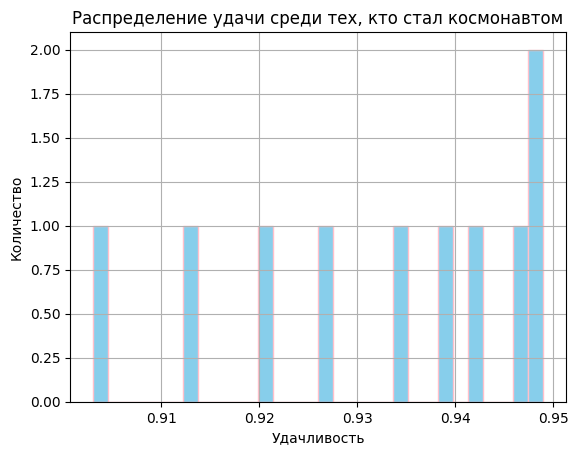

In [ ]:
# your code here
# (⌐■_■)
np.random.seed(42)
luck_from_all = []
# создадим массив с нулями, куда будем складывать значения лучших десяти
vec_of_top_ten =np.zeros(10)
vec_of_skills =np.zeros(10)
skills = np.zeros((10**4, 10**4))
scores = np.zeros((10**4, 10**4))
top_tens = np.zeros((10**4, 10))
scores_of_top =np.zeros((10**4, 10))
#делаем симуляцию 10000 раз, чтобы увидеть среднее из полученной статистики
for i in range(10**4):
# создаем вектор случайных величин удачи и скилов для каждого кандидата
  skill = np.random.uniform(0, 1, 10**4)
  skills[i] = skill
  luck = np.random.uniform(0, 1,  10**4)

# считаем итоговую величину для каждого
  score = 0.95 * skill + 0.05 * luck
  scores[i] = score

# используем функцию np.argpartition из хинта, чтобы выбрать 10 лучших
  top_ten = np.argpartition(score, -10)[-10:]
  top_tens[i] = top_ten

  #добавляем к каждому элементу
  vec_of_top_ten += luck[top_ten]
  scores_of_top[i] = luck[top_ten]

# Оценим среднее значение удачливости тех, кто стал космонавтом
  luck_from_all.append(np.mean(luck[top_ten]))

print("Среднее значение удачливости тех, кто стал космонавтом:", np.mean(luck_from_all))
#делим на количесвто симуляций
result = vec_of_top_ten/10**4
# теперь строим гистограмму
plt.hist(result, bins=30, edgecolor='pink', color= 'skyblue')
plt.xlabel('Удачливость')
plt.ylabel('Количество')
plt.title('Распределение удачи среди тех, кто стал космонавтом')
plt.grid()
plt.show()




Из данной гистограммы мы можем сделать небольшой вывод, что показатели кандидатов, которые стали космонавтами достаточно высокие и стремятся к $1$, в нашем случае (при наших случайных значениях) это также видно из среднего $(0.93)$

__б) [5 баллов]__  Отберите космонавтов по навыкам, `skill`. Оцените с помощью симуляций, на сколько в среднем человек топ кандидатов по `skill` пересекается с топом по `score`.

In [ ]:
# your code here
# ٩(ˊ〇ˋ*)و
np.random.seed(42)
res = 0
#делаем симуляцию 10000 раз, чтобы увидеть среднее из полученной статистики
for j in range(10**4):
  top_skill_ten = np.argpartition(skills[j], -10)[-10:]

# Подсчет пересечения топа по навыкам и топа по итоговому баллу
  intersection = len(set(top_skill_ten).intersection(top_tens[j]))
  res+=intersection

# Оценка среднего количества пересечений
mean_intersection = res / 10**4
print("Среднее количество пересечений между топом по навыкам и топом по итоговому баллу:", mean_intersection)


Среднее количество пересечений между топом по навыкам и топом по итоговому баллу: 1.8195


__в) [5 баллов]__ А что будет, если мы будем отбирать больше космонавтов?

Для каждого $n$ от $10$ до $500$ с шагом в $10$ сделайте процедуру отбора в космонавты топ-$n$ кандидатов по `skill` и по `score`. Посчитайте, на сколько в среднем процентов отличаются эти топы. Изобразите получившуюсья зависимость на графике. По оси абсцисс отложите $n$, по оси ординат процент пересечения.

17.733352937895823


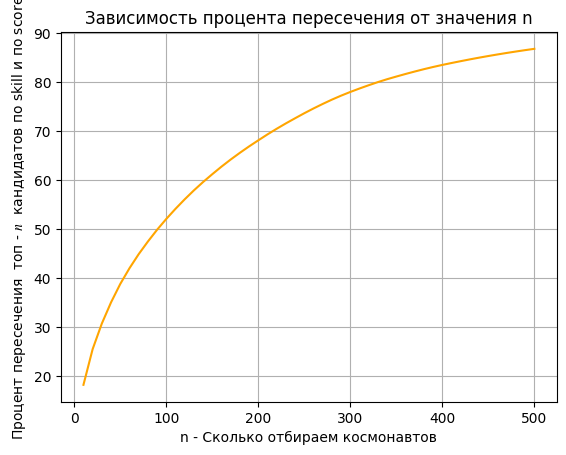

In [ ]:
# your code here
# (っ˘ڡ˘ς)

# Создание массивов для сохранения процентов пересечения
percent_skill = []

# Цикл для каждого значения n от 10 до 500 с шагом в 10
for n in range(10, 501, 10):

  red = 0
  for j in range(10**4):
    # Генерация навыков и удачливости для всех кандидатов
    # Выбор топ-n кандидатов по skill
    top_n_skill = np.argpartition(skills[j], -n)[-n:]

    # Выбор топ-n кандидатов по score
    top_n_score = np.argpartition(scores[j], -n)[-n:]

    # Подсчет количества кандидатов, присутствующих в обоих топах

    cnt = len(set(top_n_skill).intersection(top_n_score))
    red += cnt
    # Рассчет процента пересечения
  red = red/10**4
  percent_skill.append((red / n ) * 100)
# посчитаем, на сколько в среднем процентов отличаются эти топыБ для этого использум стандартное отклонение
print(np.std(percent_skill))
# Построение графика
n_values = range(10, 501, 10)
plt.plot(n_values, percent_skill, color = 'orange')

plt.xlabel('n - Сколько отбираем космонавтов')
plt.ylabel('Процент пересечения  топ - $𝑛$  кандидатов по skill и по score')
plt.title('Зависимость процента пересечения от значения n')

plt.grid(True)
plt.show()


__г) [5 баллов]__ Сделайте выводы из проделанных рассчётов.

__Ответ:__ Тут надо написать выводы текстом!

> Повод ли это грустить? Конечно же, нет. Если вы попытались схватиться за одну из возможностей и у вас ничего не вышло, забудьте об этом. Не впадайте в депрессию, продолжайте пытаться. В мире есть столько возможностей, которые можно упустить. Обидно будет, если вы не попробуете ещё. Рано или поздно удача вам улыбнётся ❤️❤️❤️

Давайте попробуем понять, когда именно она вам улыбнётся.

Из изученной выборки видно, что вероятность стать космонавтом, когда отбирают только 10 человек, зависит не только от усилий(skills), но и от процента удачи. Но когда мы уже смотрим на случаи, когда отбирают больше, чем 300 косманавтов, например, то пересечение с топом по skills выше, следовательно, успех больше зависит от skills.

__д) [4 балла]__ Юра хочет стать космонавтом. У него довольно хорошо развиты навыки. Юра входит в $1\%$ лучших, его `score = 0.99` (Юра прокачал свои навыки до 0.99 и вообще не полагается на удачу). С какой вероятностью Юра станет космонавтом?

In [ ]:
#если считать, что score = 0.99, то очевидно, что Юра станет космонавтом, так как он входит в топ 10
minn = 0
count = 0
for i in range(10**4):
  minn = min(scores_of_top[i])
  if minn <= 0.99:
    count+=1
print(count/10**4)

1.0


In [ ]:
# your code here
# ٩(x̯x)۶
# если рассмотреть ситуцию, где skills = 0.99 и luck = 0, тогда scores = 0.9405
# тут уже вероятность не равна 1
minn = 0
count = 0
for i in range(10**4):
  minn = min(scores_of_top[i])
  if minn <= 0.9405:
    count+=1
print(count/10**4)



0.9977


__е) [1 балл]__ Юра пытается снова и снова. Сколько в среднем попыток ему надо сделать до первого успеха?

__Hint:__ тут не нужно ничего симулировать. Надо вспомнить про геометрическое распределение и его математическое ожидание.

In [ ]:
# your code here
# (＠_＠)
#формула мат ожидания для геом распределения(сколько попыток нужно, чтобы стать космонавтом) =1 / вероятность успеха
print(1/count/10**4)

1.0023053021950487e-08


Cледовательно, вероятнее, у Юры получится и с первой попытки, но возможно придется попробовать два раза.

## Задача 3: парадокс лифта (20 баллов)

[Райан Гослинг](https://www.youtube.com/watch?v=2jT71iFvpSM), [Стив Роджерс](https://www.youtube.com/watch?v=hLUdF8cjzyA) и [группа Radiohead](https://www.youtube.com/watch?v=QBGaO89cBMI) катаются на лифте.

В здании 30 этажей и лобби (нулевой этаж). Лифт только один и работает очень медленно. Он останавливается на каждом этаже по пути наверх, а затем на каждом этаже по пути вниз. Перемещение между этажами и ожидание пассажиров занимает минуту. Если лифт стартует с нулевого этажа в 8 утра, он в 08:30 доезжает до 30 и к 9 утра возвращается на первый этаж.

Проведите $10^4$ экспериментов и с их помощью ответьте на следующие вопросы:

__а) [5 баллов]__   Райан Гослинг в случайное время подходит к лифту на 3 этаже и ждёт его. Оцените вероятность того, что лифт приедет к Райану сверху.

In [ ]:
# your code here
# (￢_￢)

np.random.seed(42)
# заметим, что если на часах 8:03, 9:03 .. ,то лифт приедет снизу, если 8:57, 9:57.., то сверху
#Значит, мы можем 10**4 раз сгенерировать время и оценить, ему быстрее дождаться дождаться лифта сверху или снизу
from_high = 0
waiting_Ryan =[]
for _ in range(10**4):

  hour = np.random.randint(0, 23)
  minute = np.random.randint(0, 59)

  if minute>3 and minute<=57:
    from_high+=1
    a = 57 - minute
  elif minute>=57:
    a = 3 + 60 - minute
  elif minute <= 3:
    a = 3 - minute
  waiting_Ryan.append(a)


print("Вероятность того, что лифт приедет к Райану сверху:",from_high/10**4)


Вероятность того, что лифт приедет к Райану сверху: 0.9171


__б) [5 баллов]__ Группа Radiohead в случайное время подходит к лифту на 25-ом этаже и ждёт его. Оцените вероятность того, что лифт приедет к группе Radiohead сверху.

In [ ]:
# your code here
# (⌒_⌒;)
np.random.seed(42)
# заметим, что если на часах 8:25, 9:25 .. ,то лифт приедет снизу, если 8:35, 9:35.., то сверху
#Значит, мы можем 10**4 раз сгенерировать время и оценить, ему быстрее дождаться дождаться лифта сверху или снизу
from_high = 0
waiting_Radiohead =[]
for _ in range(10**4):

  hour = np.random.randint(0, 23)
  minute = np.random.randint(0, 59)

  if minute>25 and minute<=35:
    from_high+=1
    a= 35 - minute
  elif minute>35:
    a = 60 + 25 - minute
  elif minute <= 25:
    a = 25 - minute
  waiting_Radiohead.append(a)

print("Вероятность того, что лифт приедет к группе Radiohead сверху:",from_high/10**4)

Вероятность того, что лифт приедет к группе Radiohead сверху: 0.163


__в) [5 баллов]__  Постройте гистограммы времени ожидания лифта для Райана Гослинга и группы Radiohead. Похожи ли визуально распределения на нормальные? Насколько сильно они отличаются друг от друга?

24.4811


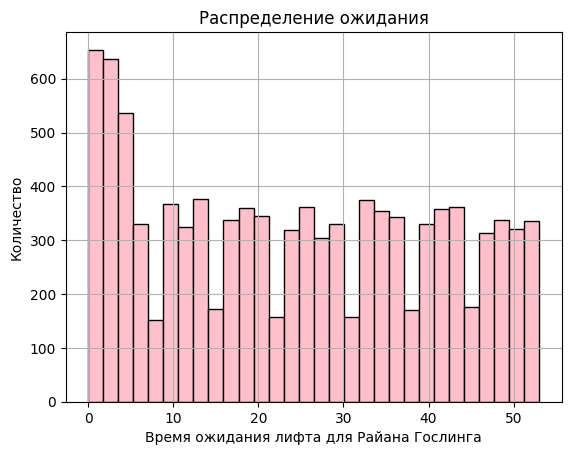

In [ ]:
# your code here
# (´｡• ᵕ •｡`)
print(np.mean(waiting_Ryan))
plt.hist(waiting_Ryan, bins = 30, edgecolor='black', color= 'pink')
plt.xlabel('Время ожидания лифта для Райана Гослинга')
plt.ylabel('Количество')
plt.title('Распределение ожидания')
plt.grid()
plt.show()

21.1777


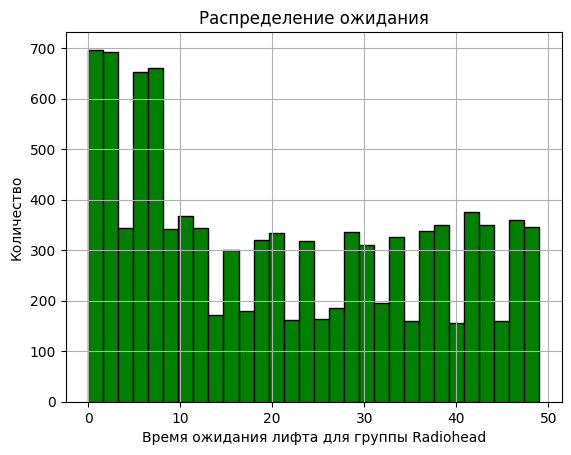

In [ ]:
print(np.mean(waiting_Radiohead))
plt.hist( waiting_Radiohead, bins = 30, edgecolor='black', color= 'green')
plt.xlabel('Время ожидания лифта для группы Radiohead')
plt.ylabel('Количество')
plt.title('Распределение ожидания')
plt.grid()
plt.show()

Как нам кажется, это распределение не похоже на нормальное, но все же можно заметить, что эти распределения похожи. Наибольшее количество замечено в области примерно до 7 минут, значит, что в среднем ожидание не очень большое в обоих слкчаях(до 7 минут). Также можно обратить внимание, что после 10 минут заметны постоянные колебания  в обоих гистограммах.

__г) [5 баллов]__ У Стива Роджерса куча свободного времени и он катается на лифте весь день. Нарисуйте для Стива два графика:

- В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат отложите оценку вероятности того, что лифт придёт сверху.
- В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат среднее время ожидания лифта.

[0.984, 0.9665, 0.9464, 0.9339, 0.9158, 0.8964, 0.8796, 0.8657, 0.8467, 0.8359, 0.8156, 0.7916, 0.7846, 0.7652, 0.7442, 0.7192, 0.713, 0.6886, 0.6766, 0.651, 0.637, 0.622, 0.6075, 0.5891, 0.5833, 0.5666, 0.5496, 0.53, 0.5094, 0.4835, 0.4782]
[29.7793, 28.1326, 26.1876, 24.5294, 22.7303, 21.272, 19.9309, 19.0644, 17.8808, 17.1531, 16.3376, 15.4194, 15.1559, 14.7259, 14.5051, 14.3788, 14.5146, 14.6298, 15.0311, 15.3444, 16.0316, 16.8377, 17.3852, 18.4997, 19.9921, 21.2285, 22.5417, 24.0437, 25.9435, 27.321, 29.592]


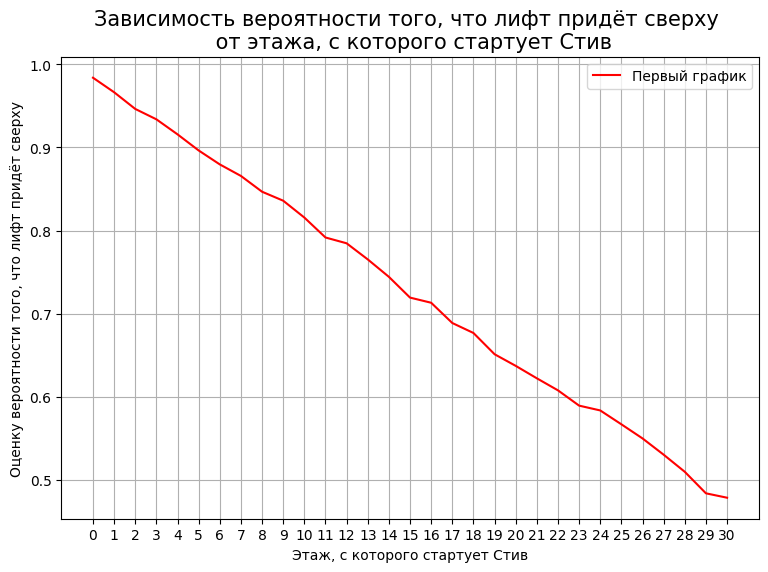

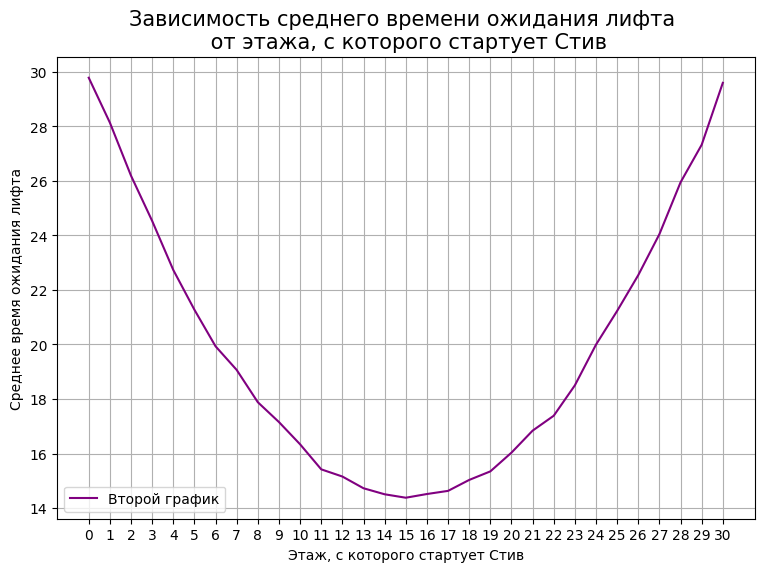

In [ ]:
# your code here ( ⚆ ω ⚆)

np.random.seed(42)
first_grath = []
second_grath = []
x = np.arange(31)


for i in range(31):
    minutes = np.random.randint(0, 59, size=(10**4,))
    from_high = np.sum((minutes > i) & (minutes <= (60 - i)))
    from_high += np.sum(minutes > (60 - i))

    waiting = np.where(minutes <= i, i - minutes, np.where(minutes > (60 - i), 60 +i - minutes, 60 -i - minutes))


    first_grath.append(from_high / 10**4)
    second_grath.append(np.mean(waiting))

print(first_grath)
print(second_grath)

plt.figure(figsize = (9, 6))
plt.plot(x, first_grath, color = 'red')


plt.title('Зависимость вероятности того, что лифт придёт сверху \n от этажа, с которого стартует Стив', fontsize=15)

plt.xlabel('Этаж, с которого стартует Стив', fontsize=10)
plt.ylabel('Оценку вероятности того, что лифт придёт сверху', fontsize=10)


plt.xticks(np.arange(0, 31))

plt.legend(labels=['Первый график'])

plt.grid()


plt.figure(figsize = (9, 6))
plt.plot(x, second_grath, color = 'purple')


plt.title('Зависимость среднего времени ожидания лифта \n от этажа, с которого стартует Стив', fontsize=15)

plt.xlabel('Этаж, с которого стартует Стив', fontsize=10)
plt.ylabel('Среднее время ожидания лифта', fontsize=10)


plt.xticks(np.arange(0, 31))

plt.legend(labels=['Второй график'])

plt.grid()
plt.show()

Также сделаем выводы по этим графикам, видно, что первый график убывающий, следовательно вероятность, что лифт приедет сверху с увеличением этажа уменьшается, это может быть довольно логично, ведь чем ниже этаж, тем вероятнее, что лифт приезжает сверху. Также наш график полностью подтверждает гипотезу парадокса лифта.


Второй график является параболой с центром с 15 по оси X. Следовательно, до 15 этажа среднее время ожидания лифта уменьшается, после увеличивается. Этот вывод также сходится в логике с прошлыми пунктами, так как мы смотрели случаи для 3 и 25 этажей, и они находятся довольно симметрично относительно 15 и среднее по ожиданию и распределение у этих этажей также довольно схожие. Получается, что если мы хотим в среднем меньше ждать лифта, нужно жить ближе к середине дома.

Как думаете, будет ли наблюдаться что-то похожее в реальной жизни? Попробуйте понаблюдать за лифтом у себя дома и в офисе. На каком этаже вы живёте/работаете? Выполняется ли для вас [парадокс лифта?](https://en.wikipedia.org/wiki/Elevator_paradox)

Думаю, что будет довольно трудно оценить что-то схожее в жизни, так как условия для этого эксперимента не совсем стандартные для обычной жизни, но наверное определенные выводы действительно будут работать для реальной жизни. Да, будет любопытно понаблюдать за этим( на 10 этаже). Мне кажется, что да, выполняется, так как 10 этаж - это как раз середина, и вероятность, что лифт приедет снизу $=$ приедет сверху, как мы и увидели в графике ранее. Также сильно заметно, что обычно ожидание лифта на моем этаже всегда меньше, чем на первом, также видно из графика.

## Задача 4: паровозики (30 баллов)

От станции Ромашково друг за другом в одном направлении отходит $100$ паровозиков с интервалом в одну минуту. Стартовые скорости паровозиков -- независимые, равномерные на отрезке $[0;1]$ случайные величины. Когда более быстрый паровозик догоняет более медленный, он снижает свою скорость до скорости догнанного паровозика.

Через достаточно длинный интервал времени паровозики разобьются на несколько групп и далее число групп меняться не будет. Назовём это число групп финальным. Проведите $1000$ симуляций и найдите ответы на следующие вопросы:

__а) [5 баллов]__  Какова вероятность того, что пятый паровозик -- лидер очередной группы?

Будем считать, что мы можем посчитать расстояние, которое проехал параовоз, по формуле $ t($количество минут $) * V$

In [ ]:
# your code here ʕ•ᴥ•ʔ
np.random.seed(42)
cnt = 0
for i in range(1000):#делаем 1000 симуляцию
  speeds = np.random.uniform(0, 1, 100)#создадим скорость для каждого паровоза как случайное число
  speed_five = speeds[4]# сохраним скорость пятого
  speeds = speeds + 1# увеличим скорость на 1, чтобы, когда мы умножаем на скорость, она не уменьшалась( то что мы все увеличили на 1 нне повлияет)
  minutes = np.zeros(100) #время для каждого
  s = np.zeros(100)#расстояние для каждого
  for i in range(300):#используем интервал 300 минут(кажется что этого достаточно)
# теперь будем оценивать и изменять скорость при необходимом условии
    j, k = np.triu_indices(100, 1)
    mask = (s[j] <= s[k]) & (s[j] > 0) & (s[k] > 0) & (speeds[j] < speeds[k])
    speeds[k[mask]] = speeds[j[mask]]
# увеличиваем время и пройденное расстояние
    minutes[:i] +=1
    s = minutes * speeds
  # теперь проверим, является ли пятый поезд лидером какой-нибудь группы
  for i in range(100):
    if speeds[i] == speed_five + 1:
      cnt+=1
      break
  #теперь находим вероятность из всех симуляций
print("Вероятность того, что пятый паровозик -- лидер очередной группы:",cnt/1000)


Вероятность того, что пятый паровозик -- лидер очередной группы: 0.218


__б) [5 баллов]__ На сколько финальных групп в среднем разбиваются паровозики?

In [ ]:
# your code here  ٩(⁎❛ᴗ❛⁎)۶
# your code here ʕ•ᴥ•ʔ
np.random.seed(42)
result = []
for i in range(1000):#делаем 1000 симуляцию
  speeds = np.random.uniform(0, 1, 100)#создадим скорость для каждого паровоза как случайное число
  speeds = speeds + 1# увеличим скорость на 1, чтобы, когда мы умножаем на скорость, она не уменьшалась( то что мы все увеличили на 1 нне повлияет)
  minutes = np.zeros(100) #время для каждого
  s = np.zeros(100)#расстояние для каждого
  for i in range(300):#используем интервал 300 минут(кажется что этого достаточно)
# теперь будем оценивать и изменять скорость при необходимом условии
    j, k = np.triu_indices(100, 1)
    mask = (s[j] <= s[k]) & (s[j] > 0) & (s[k] > 0) & (speeds[j] < speeds[k])
    speeds[k[mask]] = speeds[j[mask]]
# увеличиваем время и пройденное расстояние
    minutes[:i] +=1
    s = minutes * speeds
  # теперь проверим, является ли пятый поезд лидером какой-нибудь группы
  result.append(len(set(speeds)))
  #теперь находим вероятность из всех симуляций

print("Количество финальных групп в среднем разбиваются паровозики:" ,sum(result)/1000)



[6, 2, 4, 5, 4, 8, 5, 4, 5, 5, 7, 3, 5, 2, 7, 5, 6, 10, 9, 3, 6, 6, 7, 6, 5, 8, 5, 5, 6, 3, 6, 3, 6, 6, 5, 2, 4, 7, 5, 6, 7, 6, 8, 4, 3, 4, 6, 5, 3, 2, 6, 8, 5, 4, 6, 4, 4, 7, 8, 8, 6, 6, 5, 9, 6, 6, 5, 8, 4, 6, 2, 1, 6, 4, 3, 5, 6, 10, 5, 4, 7, 4, 7, 6, 5, 5, 7, 7, 7, 5, 11, 8, 7, 8, 8, 8, 4, 4, 6, 3, 9, 9, 8, 6, 9, 3, 6, 8, 4, 5, 6, 6, 6, 5, 4, 5, 8, 6, 7, 5, 6, 8, 5, 6, 7, 5, 5, 8, 5, 6, 5, 8, 2, 9, 9, 7, 4, 10, 4, 7, 5, 8, 6, 5, 4, 3, 4, 3, 6, 3, 6, 4, 9, 8, 9, 7, 8, 4, 8, 9, 2, 3, 8, 8, 7, 8, 8, 3, 6, 8, 8, 7, 7, 7, 7, 4, 5, 5, 9, 4, 9, 3, 4, 7, 5, 6, 3, 6, 9, 3, 7, 5, 2, 5, 6, 2, 5, 5, 5, 5, 5, 5, 3, 5, 6, 4, 4, 6, 3, 5, 8, 4, 4, 4, 6, 3, 10, 6, 6, 6, 3, 2, 6, 6, 6, 5, 4, 4, 2, 7, 4, 6, 7, 5, 6, 7, 7, 9, 5, 4, 4, 3, 5, 4, 7, 7, 8, 8, 9, 5, 5, 5, 6, 11, 6, 6, 2, 5, 7, 2, 3, 3, 5, 2, 6, 8, 8, 4, 7, 5, 4, 2, 5, 4, 7, 3, 3, 7, 4, 7, 5, 5, 3, 9, 5, 7, 5, 3, 5, 2, 5, 8, 4, 6, 4, 3, 6, 7, 5, 6, 5, 6, 5, 5, 4, 4, 6, 7, 4, 7, 3, 9, 9, 6, 3, 4, 5, 5, 9, 4, 3, 5, 8, 3, 6, 3, 7, 9, 7, 6, 6, 

__в) [10 баллов]__ Нарисуйте усреднённое по симуляциям количество групп в зависимости от времени от старта. По горизонатльной оси — время, прошедшее от старта. По вертикальной оси — среднее число групп.

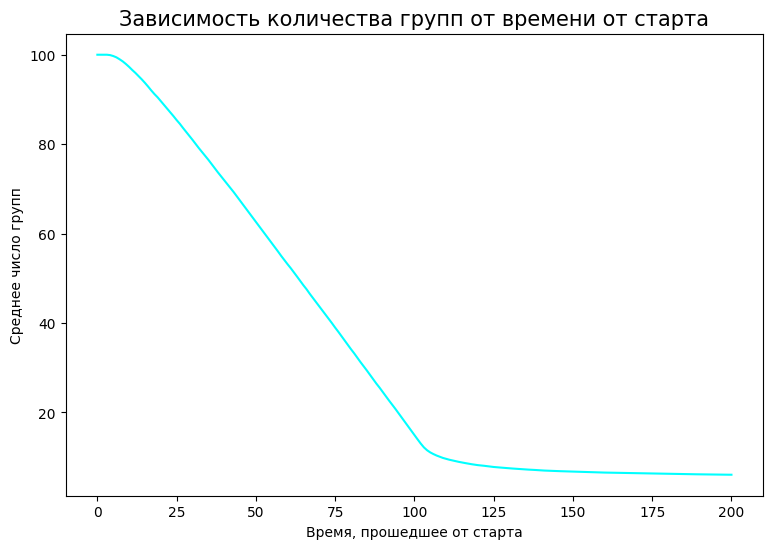

In [ ]:
# your code here  =^･ω･^=
np.random.seed(42)
#будем использовть меньше минут, так как, начиная с определенного периода количество групп и поэтому можно использовать не 300, как в прошлом номере, а 200, напрмер
time = np.arange(201)
groups = np.zeros(201)
for i in range(1000):#делаем 1000 симуляцию
  speeds = np.random.uniform(0, 1, 100)#создадим скорость для каждого паровоза как случайное число
  speeds = speeds + 1# увеличим скорость на 1, чтобы, когда мы умножаем на скорость, она не уменьшалась( то что мы все увеличили на 1 нне повлияет)
  minutes = np.zeros(100) #время для каждого
  s = np.zeros(100)#расстояние для каждого
  for i in range(201):#используем интервал 300 минут(кажется что этого достаточно)
# теперь будем оценивать и изменять скорость при необходимом условии
    j, k = np.triu_indices(100, 1)
    mask = (s[j] <= s[k]) & (s[j] > 0) & (s[k] > 0) & (speeds[j] < speeds[k])
    speeds[k[mask]] = speeds[j[mask]]
# увеличиваем время и пройденное расстояние
    minutes[:i] +=1
    s = minutes * speeds
    #добавляем количесвто разных групп в каждую минуту
    groups[i] += len(set(speeds))
  # делим на количество всех симуляций
result = groups/1000

plt.figure(figsize = (9, 6))
plt.plot(time, result, color = 'cyan')


plt.title('Зависимость количества групп от времени от старта', fontsize=15)

plt.xlabel('Время, прошедшее от старта', fontsize=10)
plt.ylabel('Среднее число групп', fontsize=10)



plt.show()

Из графика видно, что с увеличением времени уменьшается количество групп(обратная зависимость). Также можно заметить,что с самого начало видно резкое уменьшение , а потом с опрделенного момента количество групп стабилизируется(примерно около 150 минут), здесь мы и получаем наше финальное количество групп, из графика можно предположить, что оно около 5.

__г) [10 баллов]__  Оцените среднее время, в течение которого паровозики разбиваются на финальное число групп. Оцените для этой же случайной величины дисперсию.

In [ ]:
# your code here  (ﾉ´ з `)ノ
np.random.seed(42)
#будем использовть меньше минут, так как, начиная с определенного периода количество групп и поэтому можно использовать не 300, как в прошлом номере, а 200, напрмер
res = 0
vec_for_var =[]
for _ in range(1000):#делаем 1000 симуляцию
  groups = np.zeros(201)
  speeds = np.random.uniform(0, 1, 100)#создадим скорость для каждого паровоза как случайное число
  speeds = speeds + 1# увеличим скорость на 1, чтобы, когда мы умножаем на скорость, она не уменьшалась( то что мы все увеличили на 1 нне повлияет)
  minutes = np.zeros(100) #время для каждого
  s = np.zeros(100)#расстояние для каждого
  for i in range(201):#используем интервал 300 минут(кажется что этого достаточно)
# теперь будем оценивать и изменять скорость при необходимом условии
    j, k = np.triu_indices(100, 1)
    mask = (s[j] <= s[k]) & (s[j] > 0) & (s[k] > 0) & (speeds[j] < speeds[k])
    speeds[k[mask]] = speeds[j[mask]]
# увеличиваем время и пройденное расстояние
    minutes[:i] +=1
    s = minutes * speeds
    groups[i] = len(set(speeds))
  reversed_groups = groups[::-1]
  #находим момент, когда количество групп не меняется
  for l in range(200):
    if reversed_groups[l] != reversed_groups[l+1]:
      res+= 200-l
      vec_for_var.append(200-l)
      break
print(vec_for_var)
print("Cреднее время, в течение которого паровозики разбиваются на финальное число групп:",res/1000)
var = np.var(vec_for_var)
print("Дисперсия:", var)


[151, 114, 197, 155, 131, 139, 148, 156, 165, 151, 123, 126, 178, 132, 124, 163, 129, 176, 135, 148, 128, 150, 140, 177, 164, 129, 190, 128, 151, 126, 110, 129, 134, 139, 181, 139, 155, 147, 110, 162, 172, 178, 129, 147, 151, 188, 108, 174, 184, 127, 157, 177, 170, 113, 109, 163, 187, 121, 151, 187, 139, 172, 122, 177, 173, 124, 124, 119, 117, 190, 156, 154, 144, 179, 144, 196, 171, 177, 143, 136, 128, 126, 199, 163, 198, 148, 151, 131, 188, 111, 164, 175, 122, 176, 192, 160, 139, 187, 128, 148, 133, 151, 162, 121, 139, 166, 195, 112, 179, 170, 145, 116, 125, 116, 184, 125, 165, 155, 127, 141, 137, 142, 139, 125, 121, 134, 124, 126, 147, 155, 120, 123, 154, 140, 112, 165, 141, 127, 127, 116, 148, 168, 189, 166, 139, 199, 131, 115, 145, 137, 191, 138, 159, 180, 133, 164, 126, 164, 170, 164, 142, 136, 192, 188, 148, 124, 154, 200, 131, 116, 173, 111, 177, 107, 124, 158, 124, 200, 129, 135, 137, 141, 176, 109, 117, 114, 175, 174, 131, 170, 132, 133, 170, 142, 162, 167, 166, 171, 113, 139,

Как мы и предполагали в прошлом номере, момент, когда паровозикиразбиваются на финальное число групп, является 150. Дисперсия этой случайной величины, на удивление, получилось довольно большой 648.